# roBERTo Classifier

This notebook inspired in BERT/roBERTa models andd attaches an output layer that works as multiclassification. As well, this model is trained with a spanish corpus.

In [ ]:
!pip install -r requirements.txt

In [223]:
from datasets import load_dataset

dataset = load_dataset("muchocine")
dataset = dataset['train']

print(f'Features: { dataset.features }. Instances: { dataset.num_rows }')


Using custom data configuration default
Reusing dataset muchocine (/Users/ernestomancebo/.cache/huggingface/datasets/muchocine/default/1.1.1/3ed5582584cd84ef722606a3d725ef18fd4647d63195fef05c47683e5a056ccd)


Features: {'review_body': Value(dtype='string', id=None), 'review_summary': Value(dtype='string', id=None), 'star_rating': Value(dtype='int32', id=None)}. Instances: 3872


In [24]:
import numpy as np

In [224]:
summary_len = [len(str(x).split()) for x in dataset['review_summary']]
body_len = [len(str(x).split()) for x in dataset['review_body']]


In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

sns.set_style('darkgrid')

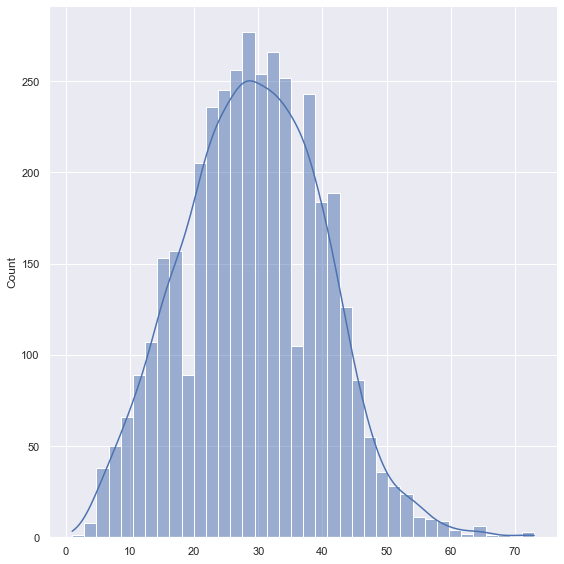

In [48]:
_ = sns.displot(summary_len, kde=True, height=8)


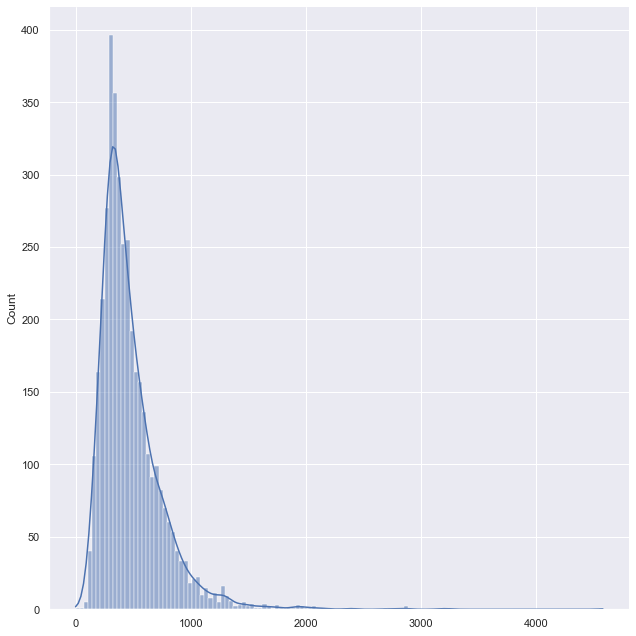

In [51]:
np.unique(dataset['star_rating'])


In [56]:
SEQ_MAX_LEN = 50

In [54]:
from transformers import AutoTokenizer

In [112]:
model_name = 'mrm8488/convbert-base-spanish'

tokenizer = AutoTokenizer.from_pretrained(model_name)

Downloading: 100%|██████████| 370/370 [00:00<00:00, 14.6kB/s]
Downloading: 100%|██████████| 242k/242k [00:04<00:00, 48.5kB/s]
Downloading: 100%|██████████| 481k/481k [00:07<00:00, 65.9kB/s]
Downloading: 100%|██████████| 112/112 [00:00<00:00, 45.7kB/s]


In [221]:
def tokenize_sequence(sequence):
    tokens = tokenizer.encode_plus(sequence,
                                   max_length=SEQ_MAX_LEN,
                                   truncation=True,
                                   padding='max_length',
                                   add_special_tokens=True,
                                   return_token_type_ids=False,
                                   return_attention_mask=True,
                                   return_tensors='tf')
    return tokens


tokenize_sequence('hola, buen dia')


{'input_ids': <tf.Tensor: shape=(1, 50), dtype=int32, numpy=
array([[   4, 9050, 1017, 1594, 6076,    5,    1,    1,    1,    1,    1,
           1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
           1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
           1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
           1,    1,    1,    1,    1,    1]], dtype=int32)>, 'attention_mask': <tf.Tensor: shape=(1, 50), dtype=int32, numpy=
array([[1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0]], dtype=int32)>}

In [225]:
Xids = np.zeros((len(dataset), SEQ_MAX_LEN))
Xmask = np.zeros((len(dataset), SEQ_MAX_LEN))



In [226]:
for i, seq in enumerate(dataset['review_summary']):
    tokens = tokenize_sequence(seq)

    Xids[i, :] = tokens['input_ids']
    Xmask[i, :] = tokens['attention_mask']


In [227]:
Xids[:2]

array([[4.0000e+00, 1.5820e+03, 1.0170e+03, 1.0670e+03, 2.3680e+03,
        1.2000e+03, 1.1530e+03, 2.5570e+03, 1.0640e+03, 5.0000e+00,
        1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00,
        1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00,
        1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00,
        1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00,
        1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00,
        1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00,
        1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00,
        1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00],
       [4.0000e+00, 1.1840e+03, 1.0447e+04, 1.0360e+03, 1.0300e+03,
        6.1290e+03, 1.0080e+03, 1.0490e+03, 9.8200e+02, 1.3480e+03,
        9.8100e+02, 1.0947e+04, 3.0931e+04, 5.0000e+00, 1.0000e+00,
        1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00,
        1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0

In [228]:
Xmask[:2]

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.]])

In [229]:
np.unique(dataset['star_rating'])

array([1, 2, 3, 4, 5])

In [230]:
label_arr = dataset['star_rating']

labels = np.zeros((len(label_arr), np.max(label_arr)))
labels.shape

(3872, 5)

In [231]:
labels[np.arange(len(label_arr)), np.subtract(label_arr,  1)] = 1

labels[:5]


array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [121]:
import os


def serialize_tensors(tensor, name, path):
    with open(f'{os.sep.join([path, name])}', 'wb') as file:
        np.save(file, tensor)


In [90]:
!mkdir -p tensors/classifier 

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [122]:
serialize_tensors(Xids, 'Xids.npy', os.sep.join(
    ['.', 'tensors', 'classifier']))
serialize_tensors(Xmask, 'Xmask.npy', os.sep.join(
    ['.', 'tensors', 'classifier']))
serialize_tensors(labels, 'labels.npy', os.sep.join(
    ['.', 'tensors', 'classifier']))

!ls ./tensors/classifier


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
Xids.npy   Xmask.npy  labels.npy


In [123]:
del dataset, Xids, Xmask, label_arr, labels

In [95]:
Xids[:2]


In [125]:
import numpy as np


def load_tensors(name, path):
    with open(os.sep.join([path, name]), 'rb') as f:
        return np.load(f)


In [126]:
Xids = load_tensors('Xids.npy', os.sep.join(['.', 'tensors', 'classifier']))
Xmask = load_tensors('Xmask.npy', os.sep.join(['.', 'tensors', 'classifier']))
labels = load_tensors('labels.npy', os.sep.join(
    ['.', 'tensors', 'classifier']))


## Input pipeline

In [101]:
import tensorflow as tf

devices = tf.config.experimental.list_physical_devices('GPU')
devices

[]

In [237]:
dataset = tf.data.Dataset.from_tensor_slices((Xids, Xmask, labels))


In [238]:
dataset.take(1)

<TakeDataset shapes: ((50,), (50,), (5,)), types: (tf.float64, tf.float64, tf.float64)>

In [234]:
def map_tensor(input_ids, masks, labels):
    return {'input_ids': input_ids, 'attention_mask': masks}, labels


In [239]:
dataset = dataset.map(map_tensor)

dataset.take(1)


<TakeDataset shapes: ({input_ids: (50,), attention_mask: (50,)}, (5,)), types: ({input_ids: tf.float64, attention_mask: tf.float64}, tf.float64)>

In [240]:
dataset = dataset.shuffle(10_000).batch(16, drop_remainder=True)

dataset.take(1)


<TakeDataset shapes: ({input_ids: (16, 50), attention_mask: (16, 50)}, (16, 5)), types: ({input_ids: tf.float64, attention_mask: tf.float64}, tf.float64)>

In [241]:
DS_LEN = len(list(dataset))
DS_LEN


242

In [242]:
SPLIT = 0.85

train = dataset.take(round(DS_LEN * SPLIT))
val = dataset.skip(round(DS_LEN * SPLIT))

del dataset


In [161]:
from transformers import TFAutoModel

In [162]:
bert = TFAutoModel.from_pretrained(model_name)

All model checkpoint layers were used when initializing TFConvBertModel.

All the layers of TFConvBertModel were initialized from the model checkpoint at mrm8488/convbert-base-spanish.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFConvBertModel for predictions without further training.


In [253]:
input_ids = tf.keras.layers.Input(
    shape=(SEQ_MAX_LEN,), name='input_ids', dtype='int32')
mask = tf.keras.layers.Input(
    shape=(SEQ_MAX_LEN,), name='attention_mask', dtype='int32')

embedings = bert.convbert(input_ids, attention_mask=mask)[0]

x = tf.keras.layers.Flatten()(embedings)
x = tf.keras.layers.Dense(128, activation='relu')(x)

y = tf.keras.layers.Dense(5, activation='softmax', name='outputs')(x)

model = tf.keras.Model(inputs=[input_ids, mask], outputs=y)

model.layers[2].trainable = False


In [251]:
help(bert.convbert)

Help on TFConvBertMainLayer in module transformers.models.convbert.modeling_tf_convbert object:

class TFConvBertMainLayer(keras.engine.base_layer.Layer)
 |  TFConvBertMainLayer(*args, **kwargs)
 |  
 |  Method resolution order:
 |      TFConvBertMainLayer
 |      keras.engine.base_layer.Layer
 |      tensorflow.python.module.module.Module
 |      tensorflow.python.training.tracking.tracking.AutoTrackable
 |      tensorflow.python.training.tracking.base.Trackable
 |      keras.utils.version_utils.LayerVersionSelector
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, config, **kwargs)
 |  
 |  call(self, input_ids=None, attention_mask=None, token_type_ids=None, position_ids=None, head_mask=None, inputs_embeds=None, output_attentions=None, output_hidden_states=None, return_dict=None, training=False, **kwargs)
 |      This is where the layer's logic lives.
 |      
 |      Note here that `call()` method in `tf.keras` is little bit different
 |      from `keras

In [254]:
model.summary()

Model: "model_6"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_ids (InputLayer)          [(None, 50)]         0                                            
__________________________________________________________________________________________________
attention_mask (InputLayer)     [(None, 50)]         0                                            
__________________________________________________________________________________________________
convbert (TFConvBertMainLayer)  TFBaseModelOutput(la 105680520   input_ids[0][0]                  
                                                                 attention_mask[0][0]             
__________________________________________________________________________________________________
flatten (Flatten)               (None, 38400)        0           convbert[6][0]             

In [243]:
train.take(1)

<TakeDataset shapes: ({input_ids: (16, 50), attention_mask: (16, 50)}, (16, 5)), types: ({input_ids: tf.float64, attention_mask: tf.float64}, tf.float64)>

In [255]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-5, decay=1e-6)
loss = tf.keras.losses.CategoricalCrossentropy()
acc = tf.keras.metrics.CategoricalAccuracy('accuracy')

model.compile(optimizer=optimizer, loss=loss, metrics=[acc])


In [256]:
train.element_spec

({'input_ids': TensorSpec(shape=(16, 50), dtype=tf.float64, name=None),
  'attention_mask': TensorSpec(shape=(16, 50), dtype=tf.float64, name=None)},
 TensorSpec(shape=(16, 5), dtype=tf.float64, name=None))

In [247]:
train.element_spec == val.element_spec

True

In [257]:
hist = model.fit(
    train,
    validation_data=val,
    epochs=4,
)


Epoch 1/4


InvalidArgumentError:  indices[4,34] = 30933 is not in [0, 30522)
	 [[node model_6/convbert/embeddings/Gather (defined at Users/ernestomancebo/projects/coloquial_bot/env/lib/python3.9/site-packages/transformers/models/convbert/modeling_tf_convbert.py:124) ]] [Op:__inference_train_function_152814]

Errors may have originated from an input operation.
Input Source operations connected to node model_6/convbert/embeddings/Gather:
 model_6/Cast (defined at var/folders/6x/pv1k062147x4rdbm_36zxwkr0000gn/T/ipykernel_23729/343053466.py:1)

Function call stack:
train_function


In [ ]:
model.save('sentiment_roberto')